##**Importing Libraries**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy
import os
import glob
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Importing Dataset**

#**Module 2: Data Preprocessing**

Download Dataset pada: https://bit.ly/DatasetExerciseDSSC4

Run code di bawah untuk upload file, lalu choose file penguins_lter.csv dan penguins_size.csv

In [2]:
from google.colab import files
uploaded = files.upload()

Saving penguins_lter.csv to penguins_lter.csv
Saving penguins_size.csv to penguins_size.csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['penguins_size.csv'])) 
study_data = pd.read_csv(io.BytesIO(uploaded['penguins_lter.csv'])) 

Memanggil tabel data

In [4]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


##**Describing Dataset**

Tampilkan statistik deskriptif dari data!

In [5]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


***
**Insight**
***
Berapa rata - rata body mass penguin?

In [ ]:
print('Rata - rata body mass penguin = ', data.body_mass_g.mean().round(2))

Rata - rata body mass penguin =  4201.75


##**Handling Missing Values**

Cek jumlah missing value!

In [6]:
#input your code here
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Mengisi missing value pada sex dengan modus!

In [7]:
#input your code here
data.sex.fillna(data.sex.mode()[0], inplace=True)

Pada baris ke 336 kolom sex, terdapat data berisi titik (.), drop baris data tersebut! 

In [9]:
#input your code here
# langkah-langkah:
# 1. lihat data ke baris 336 dan bandingkan dengan baris lainnya, misal 334 - 339
# 2. hapus data tersebut

# penyelesaian:
# 1. lihat: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
# data.sex.iloc[334:339]

# 2. lihat: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
data = data.drop(336, axis=0)

Cek kembali apakah masih ada missing value!

In [10]:
#input your code here
data.isnull().sum()

species              0
island               0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  0
dtype: int64

In [11]:
data.dropna(inplace=True)

***
**Insight**
***
Apakah masih terdapat missing value? Missing value sudah tidak ada lagi

##**Exploratory Data Analysis**

Tampilkan grafik yang menunjukkan jumlah tiap spesies pinguin!

Adelie       151
Gentoo       122
Chinstrap     68
Name: species, dtype: int64


Text(0.5, 1.0, 'Diagram Bar Jenis Spesies Penguin')

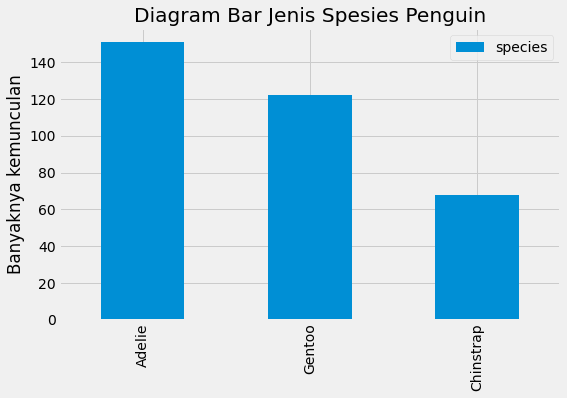

In [12]:
#input your code here 
# langkah-langkah:
# 1. hitung banyaknya spesies yang ada di dataset
# 2. buat grafiknya, cocoknya menggunakan bar chart

# penyelesaian:
# 1. lihat: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html
jenisSpesies = data['species'].value_counts()
print(jenisSpesies)

# 2. lihat: https://pandas.pydata.org/pandas-docs/version/1.1.1/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
jenisSpesies.plot(kind='bar')
plt.legend()
plt.ylabel('Banyaknya kemunculan')
plt.title('Diagram Bar Jenis Spesies Penguin')

***
**Insight**
***
Spesies apa dengan jumlah pinguin paling banyak? Adelie Penguin (Pygoscelis adeliae) dengan jumlah 152

Tampilkan scatterplot yang menunjukkan korelasi antara culmen_length dan flipper_length!

Text(0.5, 1.0, 'Diagram Scatter Korelasi Culmen_length dan Flipper_length')

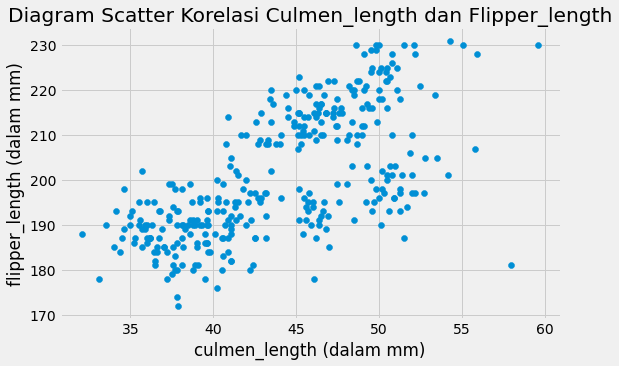

In [13]:
#input your code here
# langkah-langkah:
# 1. buat scatterplot korelasi antara culmen_length dan flipper_length

# penyelesaian:
# 1. lihat: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(data['culmen_length_mm'], data['flipper_length_mm'])
plt.xlabel('culmen_length (dalam mm)')
plt.ylabel('flipper_length (dalam mm)')
plt.title('Diagram Scatter Korelasi Culmen_length dan Flipper_length')

***
**Insight**
***
Bagaimana korelasi antara culmen_length dan flipper_length?

In [19]:
#berikut penjelasan dari korelasinya
# langkah-langkah:
# 1. buat tabel korelasinya
# 2. dari tabel korelasi tersebut, ekstrak hasilnya yang merepresentasikan hubungan culmen dan flipper

# penyelesaian:
# 1. lihat: https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
korelasiCulmenFlipper = np.corrcoef(data['culmen_length_mm'], data['flipper_length_mm'])
print(korelasiCulmenFlipper, '\n')

# 2.
print('Sehingga, korelasi antara culmen_length dan flipper_lengt adalah: ', round(korelasiCulmenFlipper[0][1] ,2))
print('Menunjukkan hubungan korelasi positif sedang.')

[[1.         0.65710152]
 [0.65710152 1.        ]] 

Sehingga, korelasi antara culmen_length dan flipper_lengt adalah:  0.66
Menunjukkan hubungan korelasi positif sedang.


Tampilkan scatterplot yang menunjukkan korelasi antara flipper_length dan body_mass!

Text(0.5, 1.0, 'Diagram Scatter Korelasi Flipper_length dan Body_mass')

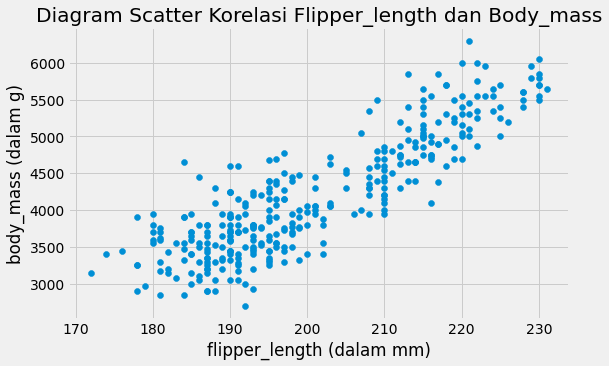

In [20]:
#input your code here
# 1. buat scatterplot korelasi antara flipper_length dan body_mass

# penyelesaian:
# 1. lihat: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(data['flipper_length_mm'], data['body_mass_g'])
plt.xlabel('flipper_length (dalam mm)')
plt.ylabel('body_mass (dalam g)')
plt.title('Diagram Scatter Korelasi Flipper_length dan Body_mass')

***
**Insight**
***
Bagaimana korelasi antara flipper_length dan body_mass?

In [21]:
#berikut penjelasan dari korelasinya
# langkah-langkah:
# 1. buat tabel korelasinya
# 2. dari tabel korelasi tersebut, ekstrak hasilnya yang merepresentasikan flipper_length dan body_mass

# penyelesaian:
# 1. lihat: https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
korelasiCulmenFlipper = np.corrcoef(data['flipper_length_mm'], data['body_mass_g'])
print(korelasiCulmenFlipper, '\n')

# 2.
print('Sehingga, korelasi antara flipper_length dan body_mass adalah: ', round(korelasiCulmenFlipper[0][1] ,2))
print('Menunjukkan hubungan korelasi positif kuat.')

[[1.        0.8709563]
 [0.8709563 1.       ]] 

Sehingga, korelasi antara flipper_length dan body_mass adalah:  0.87
Menunjukkan hubungan korelasi positif kuat.


Tampilkan pairplot dari semua variabel!

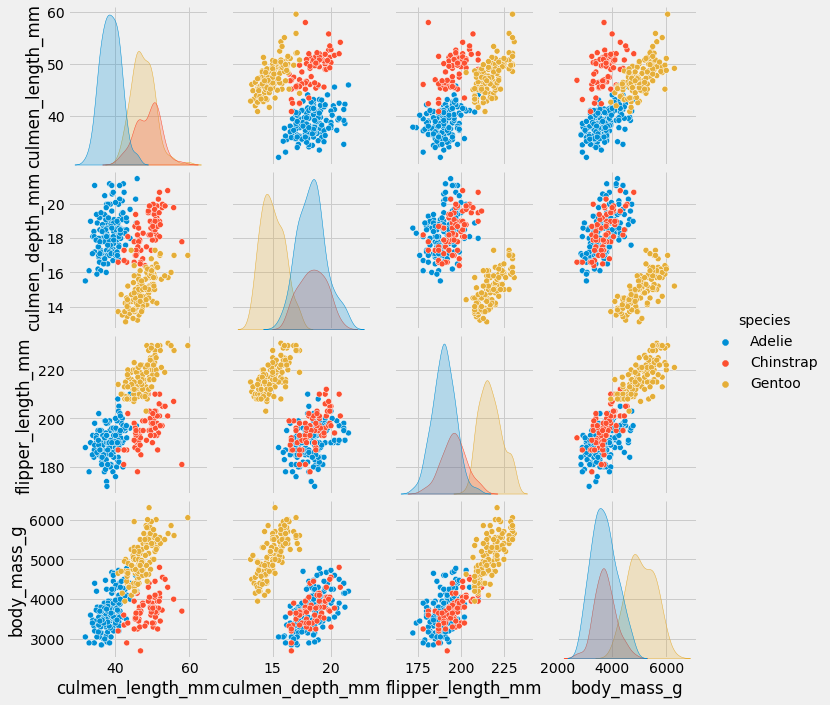

In [22]:
#input your code here
# langkah-langkah:
# 1. buat pairplot korelasi yang dibedakan berdasarkan jenis species

# penyelesaian:
# 1. lihat: https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(data, hue='species')

***
**Insight**
***
Apa kesimpulan yang dapat kamu ambil dari pairplot di atas?



Dari pairplot di atas dapat petik wawasan-wawasan seperti:

1. Semua fitur pada dataset menunjukkan hubungan korelasi yang positif untuk semua spesies.
2. Pada spesies Adelie dan Chinstrap, ternyata memiliki kesamaan ciri-ciri pada korelasi panjang culmen (paruh) dan panjang flipper (sirip).
3. Serupa dengan insight nomor 1, kedua spesies juga memiliki kesamaan ciri-ciri pada panjang culmen (paruh) dan massa tubuh.
4. Spesies Adelie memiliki massa tubuh lebih besar dari pada dua spesies lainnya.
5. Hubungan korelasi flipper dengan massa tubuh menunjukkan korelasi positif yang kuat.
6. Hubungan korelasi culmen dengan flipper menunjukkan korelasi positif yang sedang.